In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

from dataset import VNAgriDataset

# Đọc dữ liệu lúa gạo

In [2]:
with open("../../data/Lua, gao", "r", encoding="utf-16") as file:
    luagao = file.read()

In [3]:
luagao_df = pd.read_html(luagao)[0]
luagao_df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15636\1908528553.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  luagao_df = pd.read_html(luagao)[0]


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
0,CLC 4900,Cần Thơ,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,16000.00
1,IR 5451,Cần Thơ,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,7000.00
2,Jasmine,Cần Thơ,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,11266.67
3,OM 18,Cần Thơ,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,7000.00
4,OM 5451,Cần Thơ,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,6000.00


# Kiểm tra dữ liệu thiếu

In [4]:
luagao_df.isnull().sum()

Tên_mặt_hàng    0
Thị_trường      0
Loại_giá        0
Đơn_vị_tính     0
Loại_tiền       0
Nguồn           0
Ngày            0
Giá             0
dtype: int64

# Kiểm tra dữ liệu thừa

In [5]:
luagao_df.duplicated().sum()

np.int64(3)

In [6]:
luagao_df = luagao_df[~luagao_df.duplicated()]

# Kiểm tra giá trị ngoại lai

In [7]:
gia_luagao = luagao_df["Giá"]

<Axes: ylabel='Giá'>

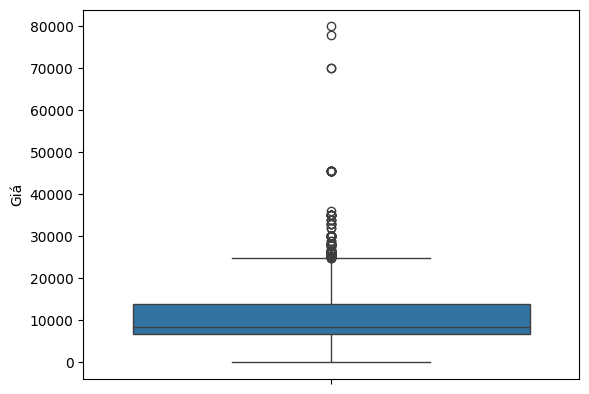

In [8]:
sns.boxplot(y=gia_luagao)

In [9]:
len(luagao_df["Tên_mặt_hàng"].unique())

181

# Kiểm tra mặt hàng riêng biệt

In [10]:
dataset = VNAgriDataset("../../data/Lua, gao")
outlier_filtered = dataset.get_outlier_mathang()

d:\University\Nam 3\HK3\Project 3\Code\src\preprocess\dataset.py:27: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  self.data = pd.read_html(html)[0]


In [11]:
outlier_filtered

('Gạo nếp cái hoa vàng',
 'Lúa OM 6976',
 'Gạo thơm Jasmine',
 'Lúa BC15',
 'Lúa Q5')

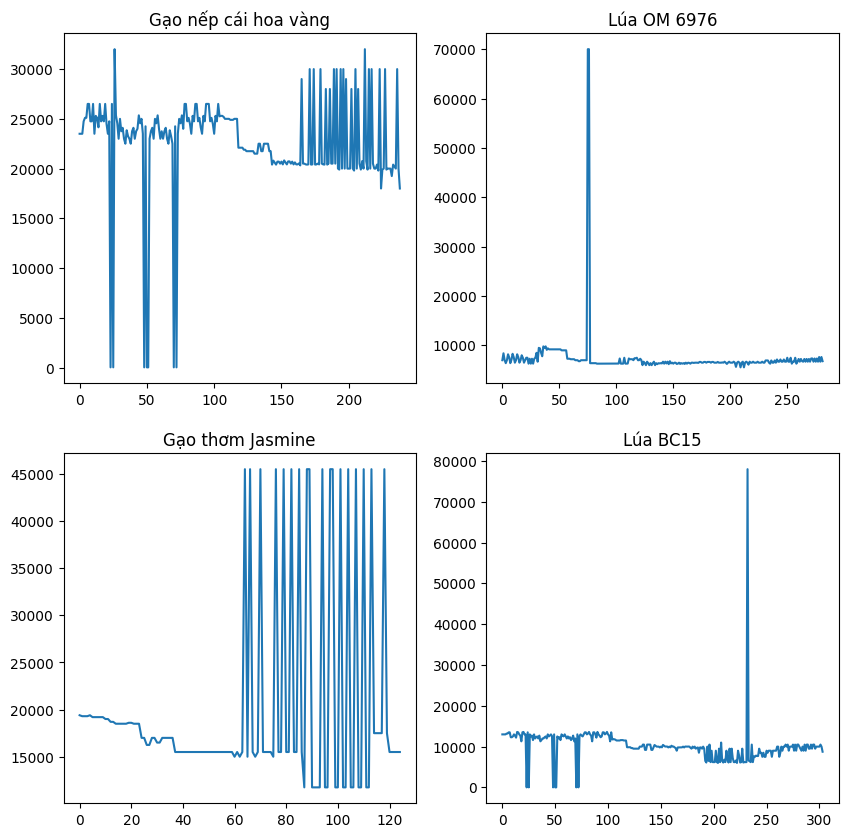

In [12]:
dataset.plot(outlier_filtered[:4], 2, 2, figsize=(10, 10))

In [13]:
outlier_infos = dataset.get_outlier_infos()

names = [x[0] for x in outlier_infos]
min_vals = [x[4] for x in outlier_infos]
max_vals = [x[5] for x in outlier_infos]

## 0 - Lúa nếp hoa vàng

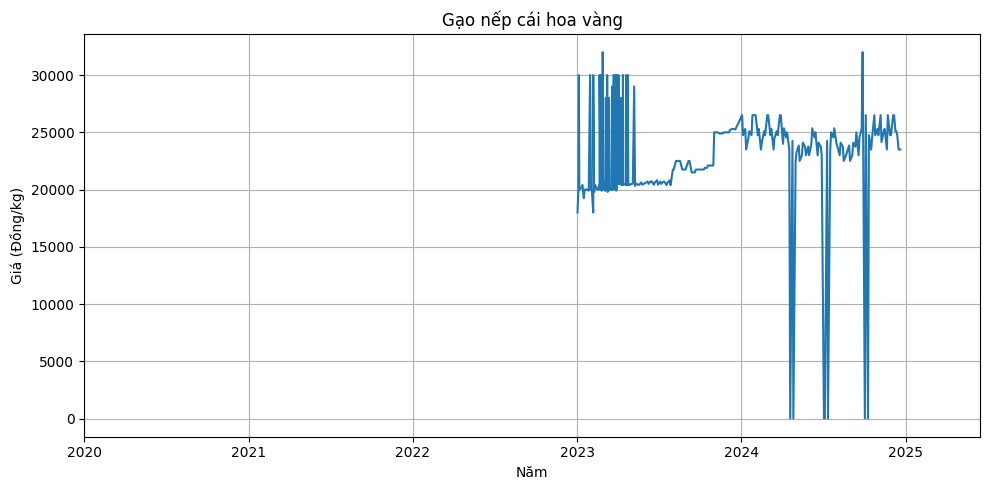

In [14]:
dataset.plot_one(names[0])

In [15]:
print(dataset.calc_outlier_perc(names[0], min_vals[0], max_vals[0]))
dataset.get_outlier_mathang_df(names[0], min_vals[0], max_vals[0])

0.03765690376569038


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
1822,Gạo nếp cái hoa vàng,Thái Bình,Thu mua,Đồng/kg,VNĐ,huyện Thái Thụy,2024-10-09,25.10
1921,Gạo nếp cái hoa vàng,Thái Bình,Thu mua,Đồng/kg,VNĐ,huyện Thái Thụy,2024-10-02,26.50
1969,Gạo nếp cái hoa vàng,Thái Bình,Thu mua,Đồng/kg,VNĐ,huyện Thái Thụy,2024-09-27,32000.00
3111,Gạo nếp cái hoa vàng,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-07-12,24.60
3215,Gạo nếp cái hoa vàng,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-07-05,23.75
3269,Gạo nếp cái hoa vàng,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-07-03,23.75
4260,Gạo nếp cái hoa vàng,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-04-26,23.75
4364,Gạo nếp cái hoa vàng,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-04-19,24.60
11120,Gạo nếp cái hoa vàng,Hà Nội,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-02-27,32000.00


In [16]:
_ = dataset.change_outlier_values_df(
    names[0],
    min_vals[0],
    max_vals[0],
    lambda x: x * 1000 if x < 1000 else x,
    inplace=True
)

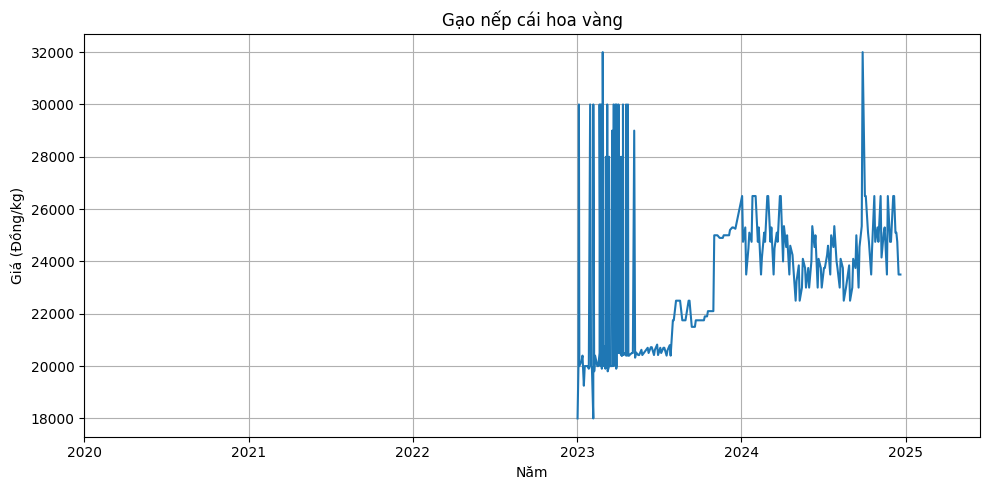

In [17]:
dataset.plot_one(names[0])

# 1 - Lúa OM 6976

In [18]:
names[1]

'Lúa OM 6976'

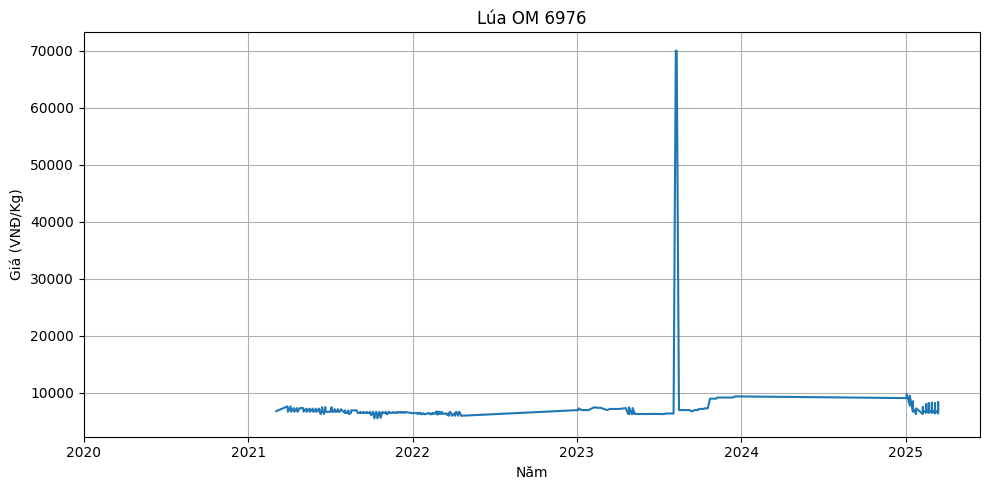

In [19]:
dataset.plot_one(names[1])

In [20]:
print(dataset.calc_outlier_perc(names[1], min_vals[1], max_vals[1]))
dataset.get_outlier_mathang_df(names[1], min_vals[1], max_vals[1])

0.09574468085106383


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
636,Lúa OM 6976,Sóc Trăng,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,2025-01-17,8500.0
644,Lúa OM 6976,Đồng Tháp,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,2025-01-10,9500.0
646,Lúa OM 6976,Hậu Giang,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,2025-01-10,9400.0
647,Lúa OM 6976,Sóc Trăng,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,2025-01-10,8500.0
661,Lúa OM 6976,Đồng Tháp,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,2025-01-03,9800.0
663,Lúa OM 6976,Hậu Giang,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,2025-01-03,9500.0
664,Lúa OM 6976,Sóc Trăng,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,2025-01-03,9800.0
668,Lúa OM 6976,Trà Vinh,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,2025-01-03,9100.0
6051,Lúa OM 6976,Kiên Giang,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,2023-12-19,9400.0
6104,Lúa OM 6976,Kiên Giang,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,2023-12-14,9200.0


In [21]:
_ = dataset.change_outlier_values_df(
    names[1],
    min_vals[1],
    max_vals[1],
    lambda x: x / 10 if x >= 50000 else x,
    inplace=True
)


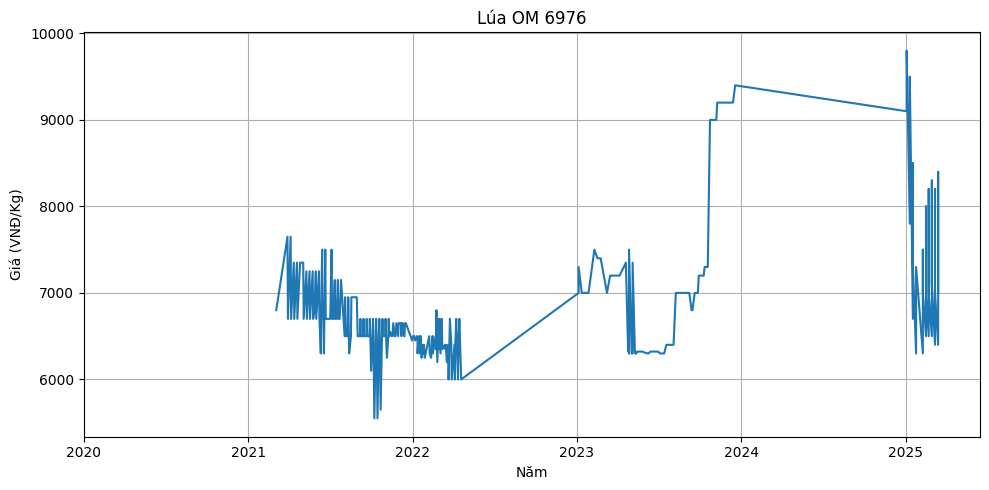

In [22]:
dataset.plot_one(names[1])

## 2 - Gạo thơm Jasmine

In [23]:
names[2]

'Gạo thơm Jasmine'

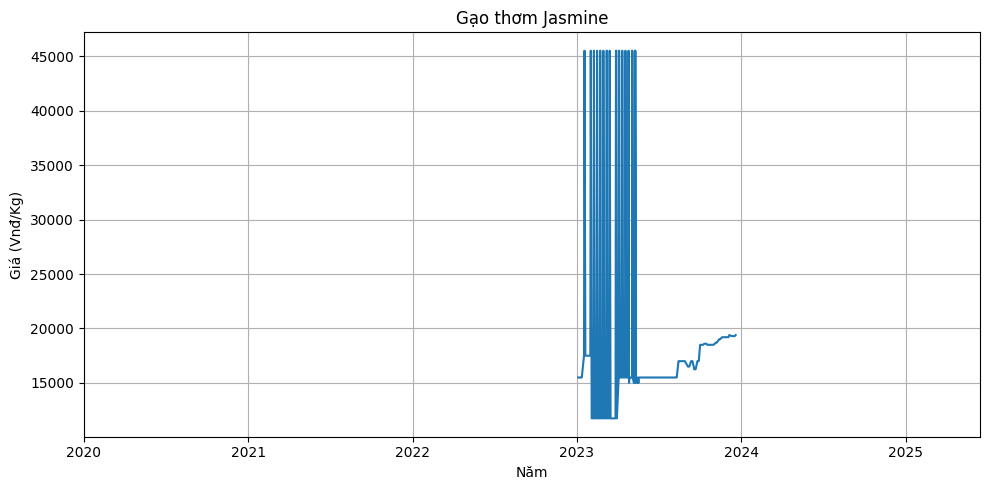

In [24]:
dataset.plot_one(names[2])

In [25]:
print(dataset.calc_outlier_perc(names[2], min_vals[2], max_vals[2]))
dataset.get_outlier_mathang_df(names[2], min_vals[2], max_vals[2])

0.144


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
9331,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-05-11,45500.0
9375,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-05-10,45500.0
9515,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-05-04,45500.0
9717,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-04-26,45500.0
9895,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-04-19,45500.0
10059,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-04-12,45500.0
10252,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-04-05,45500.0
10373,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-03-30,45500.0
10411,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-03-29,45500.0
10716,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-03-15,45500.0


In [26]:
luagao_df[luagao_df["Tên_mặt_hàng"] == names[2]].sort_values(by="Giá")

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
10802,Gạo thơm Jasmine,An Giang,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,3/10/2023 12:00:00 AM,11750.0
10929,Gạo thơm Jasmine,An Giang,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,3/7/2023 12:00:00 AM,11750.0
11090,Gạo thơm Jasmine,An Giang,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,2/28/2023 12:00:00 AM,11750.0
11002,Gạo thơm Jasmine,An Giang,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,3/3/2023 12:00:00 AM,11750.0
11165,Gạo thơm Jasmine,An Giang,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,2/24/2023 12:00:00 AM,11750.0
...,...,...,...,...,...,...,...,...
11533,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2/8/2023 12:00:00 AM,45500.0
11388,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2/15/2023 12:00:00 AM,45500.0
11226,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2/22/2023 12:00:00 AM,45500.0
11690,Gạo thơm Jasmine,An Giang,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2/1/2023 12:00:00 AM,45500.0


## 3 - Lúa BC15

In [28]:
names[3]

'Lúa BC15'

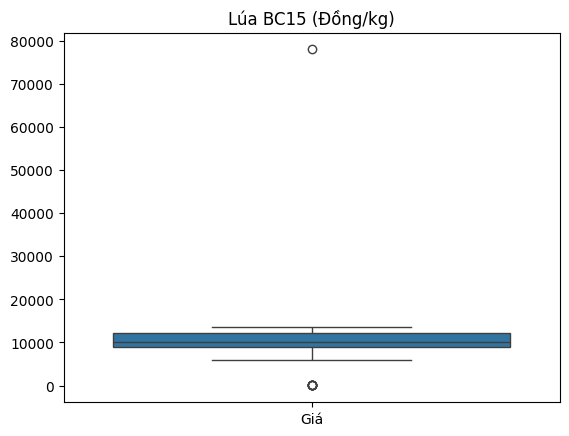

In [29]:
dataset.show_boxplot(names[3])

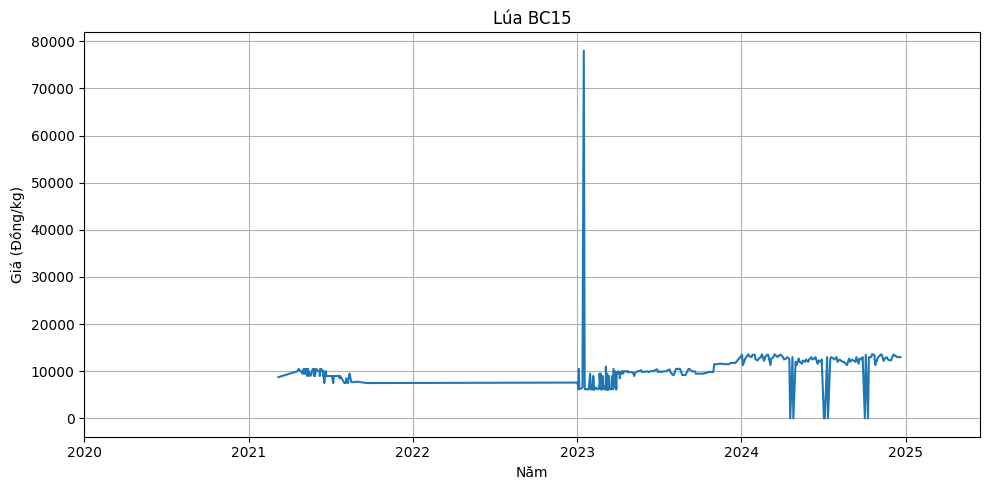

In [30]:
dataset.plot_one(names[3])

In [31]:
print(dataset.calc_outlier_perc(names[3], min_vals[3], max_vals[3]))
dataset.get_outlier_mathang_df(names[3], min_vals[3], max_vals[3])

0.02631578947368421


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
1824,Lúa BC15,Thái Bình,Thu mua,Đồng/kg,VNĐ,Thành phố Thái Bình,2024-10-09,13.2
1923,Lúa BC15,Thái Bình,Thu mua,Đồng/kg,VNĐ,Thành phố Thái Bình,2024-10-02,13.5
3113,Lúa BC15,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-07-12,13.2
3217,Lúa BC15,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-07-05,13.5
3271,Lúa BC15,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-07-03,13.5
4262,Lúa BC15,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-04-26,13.5
4366,Lúa BC15,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-04-19,13.2
12009,Lúa BC15,Thái Bình,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-01-16,78000.0


In [33]:
_ = dataset.change_outlier_values_df(
    names[3],
    min_vals[3],
    max_vals[3],
    lambda x: x * 1000 if x < 1000 else x,
    inplace=True
)

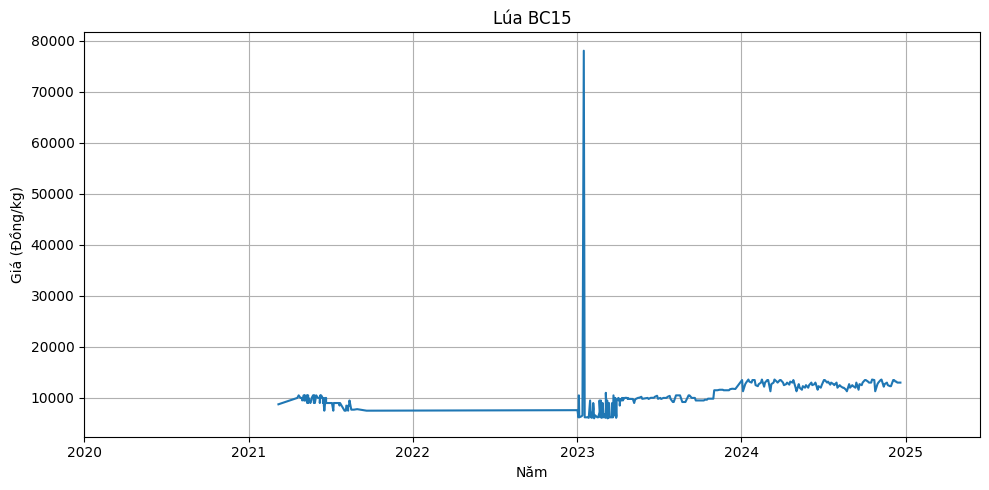

In [34]:
dataset.plot_one(names[3])

## 4 - Lúa Q5

In [35]:
names[4]

'Lúa Q5'

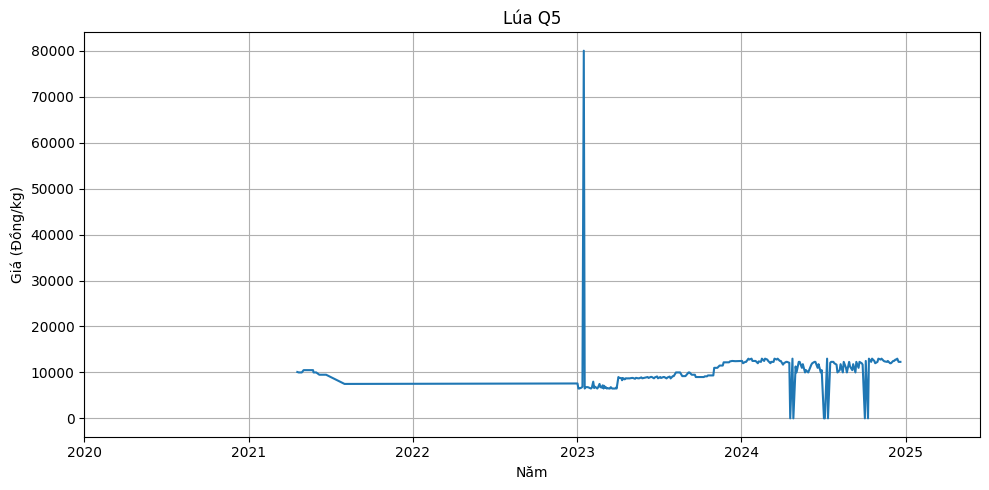

In [36]:
dataset.plot_one(names[4])

In [37]:
print(dataset.calc_outlier_perc(names[4], min_vals[4], max_vals[4]))
dataset.get_outlier_mathang_df(names[4], min_vals[4], max_vals[4])

0.0321285140562249


,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
1826,Lúa Q5,Thái Bình,Thu mua,Đồng/kg,VNĐ,huyện Quỳnh Phụ,2024-10-09,12.8
1925,Lúa Q5,Thái Bình,Thu mua,Đồng/kg,VNĐ,huyện Quỳnh Phụ,2024-10-02,12.5
3115,Lúa Q5,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-07-12,12.8
3219,Lúa Q5,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-07-05,12.5
3273,Lúa Q5,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-07-03,12.5
4264,Lúa Q5,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-04-26,12.5
4368,Lúa Q5,Thái Bình,Thu mua,Đồng/kg,VNĐ,CTV địa phương,2024-04-19,12.8
12011,Lúa Q5,Thái Bình,Khác,VNĐ/Kg,VNĐ,CTV địa phương,2023-01-16,80000.0


In [38]:
_ = dataset.change_outlier_values_df(
    names[2],
    min_vals[2],
    max_vals[2],
    lambda x: x * 1000 if x < 1000 else x,
    inplace=True
)

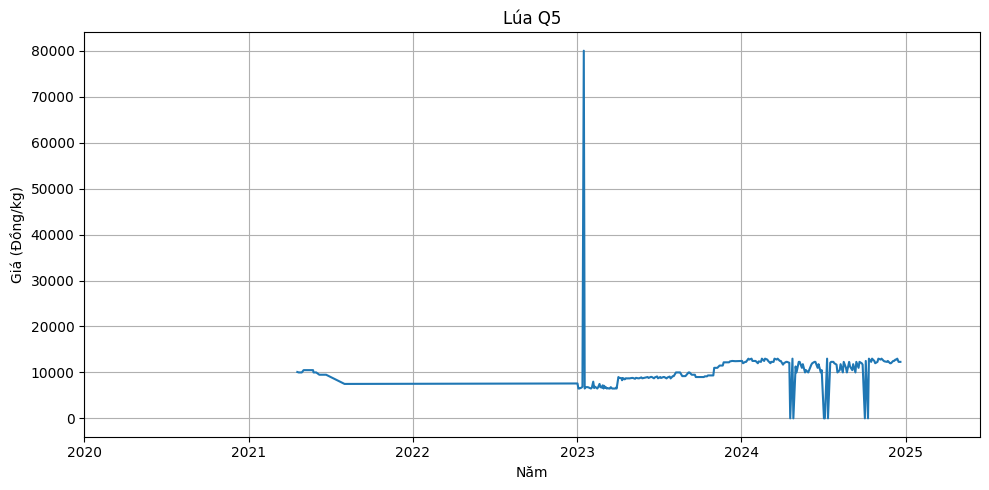

In [39]:
dataset.plot_one(names[4])